# Summary Jonas Feierabend 
I have looked at the data. It's not a big problem to drop all the columns with nan values because the percentage is very low.  
I dont know why my data Pipeline is not so good. It's much fancier than to do it on my own but it has worse performance. 

Im a bit frustrated because i tried different models and optmized RandomForrest for ages just to come to the conclusion that the GradientBoostingRegressor in combination with the Random Search CV yields the best results.   

I have done: 
- Linear Regression
- Random Forrest (quite good) 
- GradientBoostingRegressor with RandomSearchCV

My work is on Graddle:  
https://www.kaggle.com/code/jonasfeierabend21/ensemble  
Github  
https://github.com/Jonas-Feierabend/DAT158_Machine_Learning  

The Gradio doesn't work in the kaggle notebook but it should run locally and I host
it on HuggingFaces  
https://huggingface.co/spaces/JonasFeierabend/DAT158  

In [6]:
'''Read the data '''
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy 

def data(): 
    # load data 
    training = pd.read_csv("/kaggle/input/dat1582/training_data.csv")
    # load data 
    test = pd.read_csv("/kaggle/input/dat1582/test_data.csv")
    all_data = pd.concat(map(pd.read_csv, ["/kaggle/input/dat1582/training_data.csv", "/kaggle/input/dat1582/training_data.csv"]))


    train_data= training.sort_values(by="id")
    test_data = test.sort_values(by="id")
    all_data = all_data.sort_values(by="id")
    
    return train_data, test_data, all_data

train_data, test_data, all_data = data() 

In [4]:
train_data.head()

,id,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay
20195,0,2012-10-19,0,M,False,False,False,False,False,True,...,142.592340,152.996500,14.0,1.062698,32.137835,75,6.4,4,E,4
33060,1,2012-04-23,0,M,False,False,False,False,False,False,...,137.234417,147.976483,12.0,1.199566,29.079780,79,6.5,4,B,1
59996,2,2012-09-07,0,F,False,False,False,False,False,False,...,138.184388,151.761622,12.0,1.079850,32.477699,74,6.5,7,A,2
30847,3,2012-02-02,0,F,False,False,False,False,False,False,...,134.912988,147.310011,12.0,0.773003,29.181104,66,6.5,1,B,1
8882,4,2012-04-22,2,M,False,False,False,False,False,True,...,135.914756,151.560766,15.0,1.196327,29.109964,72,7.1,1,E,5


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 20195 to 43131
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          70000 non-null  int64  
 1   vdate                       70000 non-null  object 
 2   rcount                      70000 non-null  int64  
 3   gender                      69647 non-null  object 
 4   dialysisrenalendstage       70000 non-null  bool   
 5   asthma                      70000 non-null  bool   
 6   irondef                     70000 non-null  bool   
 7   pneum                       70000 non-null  bool   
 8   substancedependence         70000 non-null  bool   
 9   psychologicaldisordermajor  70000 non-null  bool   
 10  depress                     70000 non-null  bool   
 11  psychother                  70000 non-null  bool   
 12  fibrosisandother            70000 non-null  bool   
 13  malnutrition                7000

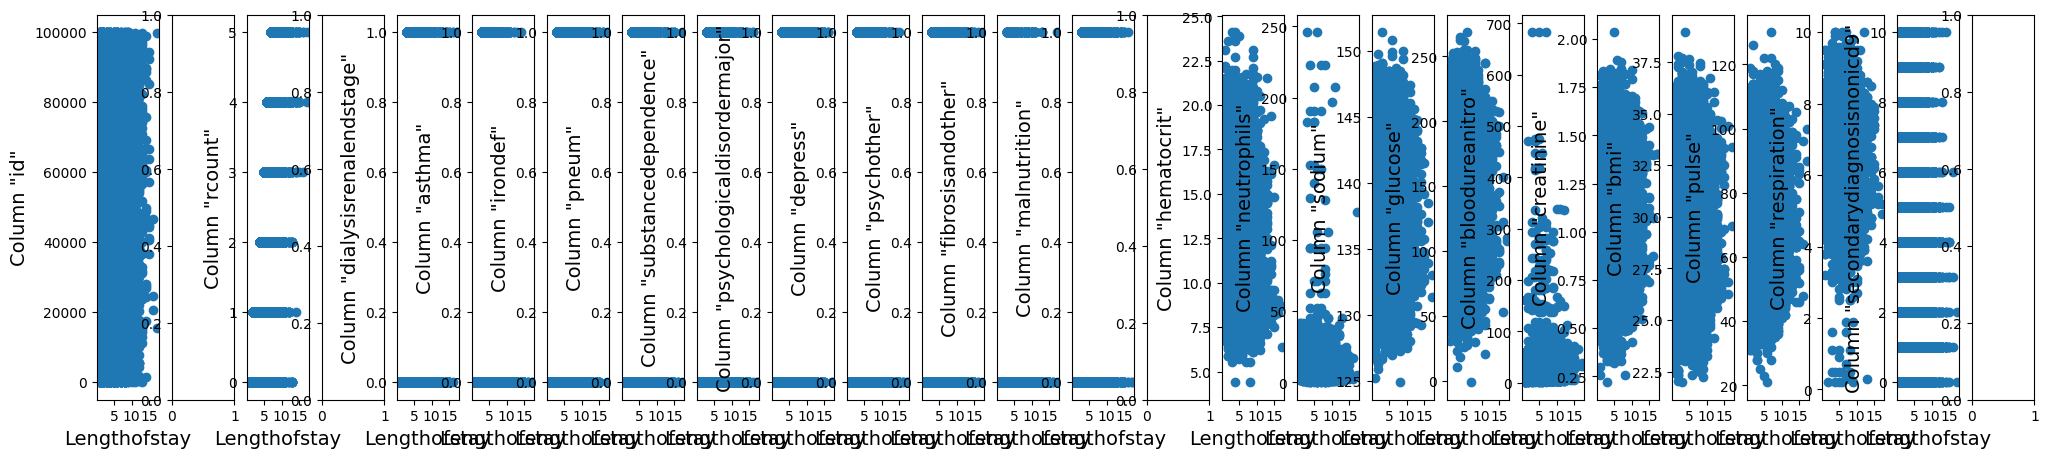

In [14]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, len(train_data.columns) - 1, figsize=(25, 5))

# Iterate through the columns and create scatter plots
for i, col in enumerate(train_data.columns[:-1]):  # Skip the first column ('a')
    if(train_data[col].dtype == 'object'):
        continue
    axes[i].scatter(train_data['lengthofstay'], train_data[col])
    axes[i].set_xlabel('Lengthofstay')
    axes[i].set_ylabel(f'Column "{col}"')


plt.show()


In [7]:
'''Transform data with pipeline'''
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


def preprop(): 
    num_attribs = ["rcount","hematocrit","neutrophils","sodium","glucose",
              "bloodureanitro","creatinine","secondarydiagnosisnonicd9",
              "respiration","neutrophils","bmi","pulse"]

    cat_attribs = ["facid","dialysisrenalendstage","asthma",
               "irondef","pneum","substancedependence",
              "psychologicaldisordermajor","depress",
              "psychother","fibrosisandother",
              "malnutrition","hemo","gender"]

    num_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler())


    cat_pipeline = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore"))

    preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
    return preprocessing 
preprocessing = preprop() 

In [ ]:
"""Linear regression - not good performance"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class lin_reg(): 
    def lin_reg():
        pass 
    def train(self,data):
        preprocessing,labels,data = transform_data(data)
        lin_reg = make_pipeline(preprocessing,LinearRegression())

        print("training with length:", len(data))
        lin_reg.fit(data,labels)
        return lin_reg 
    
    def predict(self,data,lin_reg):
        print("predict with length + ",len(data))
        pred = lin_reg.predict(data)
        return pred 

    #write to csv 
    def to_csv(self,data,pred): 
        preds = pred 
        ids = []
        for index, row in data.iterrows():
            for index, value in row.items():
                if(index == "id"):
                    ids.append(value)



        df = pd.DataFrame({'id': ids,
                           'lengthofstay': preds})
        import os 
        if(not os.path.exists("./output")):
            os.makedirs("./output")
        df.to_csv("./output/linear_reg2.csv",index=False)



    def validate(self,data,lin_reg):
        labels = data["lengthofstay"].copy() 
        print("validate with length ", len(data))
        pred = lin_reg.predict(data)
        print(mean_squared_error(labels, pred,squared=False))
        print(r2_score(labels, pred)) 
    

    
#my_lin_reg = lin_reg() 

#lin_reg = my_lin_reg.train(all_data)
#my_lin_reg.validate(training,lin_reg)
#pred = my_lin_reg.predict(test,lin_reg)
#to_csv(test,pred)

In [ ]:
'''Random Forest with grid search '''
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import joblib 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



class random_forrest: 
    def __init__(self,preprocessing):
        self.model = None 
        self.preprocessing = preprocessing 
        
    def load_model(self,path):
        self.model = joblib.load(path)
        
        
    def train(self,train_data): 
        training_data = train_data.drop("lengthofstay",axis=1)
        training_labels = train_data["lengthofstay"].copy()
        training_data = training_data.drop("vdate",axis=1)

        full_pipeline = Pipeline([
            ("preprocessing", self.preprocessing),
            ("random_forest", RandomForestRegressor(random_state=42)),
        ])
        #bisher 10 max features am besten 
        param_grid = [
            {'random_forest__max_features': [16]            }

        ]
        self.model = GridSearchCV(full_pipeline, param_grid, cv=2,
                                   scoring='neg_root_mean_squared_error',verbose=2)
        self.model.fit(training_data, training_labels)
    
    

    def measure(self,data):
        print("measuring...")
        X = train_data.drop("lengthofstay",axis=1)
        y = train_data["lengthofstay"].copy()
        X = X.drop("vdate",axis=1)
        pred = self.model.predict(X)
        
        print("mean squared: " , mean_squared_error(y, pred,squared=False))
        print("r2: ", r2_score(y, pred)) 
        self.compare(data,pred)
        
        
    def compare(self,data,pred): 
        """Look at the predictions compared to the labels"""
        training_data = data.drop("lengthofstay",axis=1)
        training_data = training_data.drop("vdate",axis=1)
        labels = data["lengthofstay"].copy()
        x = data["id"].copy() 
    
        
        x = x[2000:2100]
        pred = pred[2000:2100]
        labels = labels[2000:2100]
        
        plt.scatter(x, pred, color="red",alpha=0.5)
        plt.scatter(x,labels, color="blue",alpha=0.5)
        # Achsenbeschriftungen hinzufügen
        plt.xlabel('X-Koordinaten')
        plt.ylabel('Y-Koordinaten')

        # Titel hinzufügen
        plt.title('Streudiagramm')

        # Diagramm anzeigen
        plt.show()
        
    def to_csv(self,data,name="rf"): 
        
        pred = self.model.predict(data)
        preds = []
        
        for e in pred:
            preds.append(round(e))
        ids = []
        for index, row in data.iterrows():
            for index, value in row.items():
                if(index == "id"):
                    ids.append(value)

        

        df = pd.DataFrame({'id': ids,
                           'lengthofstay': preds})
        import os 
        if(not os.path.exists("./output")):
            os.makedirs("./output")
        df.to_csv("./output/"+name+".csv",index=False)
        
    def printModelInfo(): 
        cv_res = pd.DataFrame(self.model.cv_results_)
        cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
        print(cv_res)
        print(self.model.best_params_)
              
import joblib              
import os 
def train_and_save(): 
    rf = random_forrest(preprocessing) # 3 gride mit cv 2 = 0.24126; und 0.98952
    rf.train(train_data)
    rf.measure(train_data)
    rf.to_csv(test_data,"final grid")

    if(not os.path.exists("./models")):
        os.makedirs("./models")
    joblib.dump(rf.model, "models/final.pkl")
    
train_and_save()

# Best config:  
{'random_forest__max_depth': 36, 'random_forest__max_features': 16, 'random_forest__min_samples_leaf': 1} 
Result 5 folds:  
mean squared:  0.24090335119740258  
r2:  0.9895520308661191  

Result 2 Folds:  
mean squared:  0.24090335119740258  
r2:  0.9895520308661191

Result 10 Folds: 
mean squared:  0.24090335119740258
r2:  0.9895520308661191


In [ ]:
# Unfortunately not good performance 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


class ensemble:
    def __init__(self,prep):
        self.pipeline = None 
        self.preprocessing = prep
    def train(self,data):
        print("training...")
        X = data.drop("lengthofstay",axis=1)
        y = data["lengthofstay"].copy()
        
        voting_clf = VotingClassifier(
                 estimators=[
                     #('lr', LogisticRegression(random_state=42,max_iter=1000)),
                     ('rf', RandomForestClassifier(random_state=42)),
                     ('svc', SVC(random_state=42))
                 ], verbose = True 
        )
        
        self.pipeline = Pipeline([
                ('prep', self.preprocessing),
                ('voting_classifier', voting_clf)
            ])
        
        param_grid = [
            {'voting_classifier__rf__max_features': [16]            }

        ]
        self.model = GridSearchCV(self.pipeline, param_grid, cv=2,
                                   scoring='neg_root_mean_squared_error',verbose=2)
        
        self.model.fit(X,y)
    def measure(self,data):
        print("measuring...")
        X = train_data.drop("lengthofstay",axis=1)
        y = train_data["lengthofstay"].copy()
        
        pred = self.pipeline.predict(X)
        
        print("mean squared: " , mean_squared_error(y, pred,squared=False))
        print("r2: ", r2_score(y, pred)) 
        
        
        
    def compare(self,data): 
        print("comparing....")
        """Look at the predictions compared to the labels"""
        training_data = data.drop("lengthofstay",axis=1)
        labels = data["lengthofstay"].copy()
        x = data["id"].copy() 
        pred = self.pipeline.predict(training_data)
        
        
        x = x[2000:2100]
        pred = pred[2000:2100]
        labels = labels[2000:2100]
        
        plt.scatter(x, pred, color="red",alpha=0.5)
        plt.scatter(x,labels, color="blue",alpha=0.5)
        # Achsenbeschriftungen hinzufügen
        plt.xlabel('X-Koordinaten')
        plt.ylabel('Y-Koordinaten')

        # Titel hinzufügen
        plt.title('Streudiagramm')

        # Diagramm anzeigen
        plt.show()
        
        
    def to_csv(self,data,name="ensemble"): 
        
        pred = self.pipeline.predict(data)
        preds = []
        
        for e in pred:
            preds.append(round(e))
        ids = []
        for index, row in data.iterrows():
            for index, value in row.items():
                if(index == "id"):
                    ids.append(value)

        

        df = pd.DataFrame({'id': ids,
                           'lengthofstay': preds})
        import os 
        if(not os.path.exists("./output")):
            os.makedirs("./output")
        df.to_csv("./output/"+name+".csv",index=False)
        

#short_train_data = train_data.head(10000)
#e = ensemble(preprocessing)
#e.train(train_data)
#e.measure(train_data)
#e.compare(train_data)

In [ ]:
#GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import numpy as np 
from sklearn.pipeline import Pipeline

training = train_data
training = train_data.dropna()
X = training.drop('lengthofstay', axis=1)  
X = X.drop("vdate", axis=1)
X['gender'] = X['gender'].map({'F': 0, 'M': 2})
X['facid'] = X['facid'].map({"A":0, "B":1, "C":2, "D":3, "E":4, "F":5})

y = training['lengthofstay']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbr_regressor = GradientBoostingRegressor( random_state=42)
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 15),
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialisieren des RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbr_regressor, param_distributions=param_dist,
                                   n_iter=3, scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=3)


random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mittlerer quadratischer Fehler: {mse}')

# n-iter 3 cv = 3: 0.18785 error with own data cleaning
# n-iter 3 cv = 3: 0.199826 error mit preprocessing
#{'subsample': 0.9, 'n_estimators': 170, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.3}
import joblib 
joblib.dump(random_search, "/kaggle/working/final_Gradien_Boosting.pkl")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END learning_rate=0.1, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=140, subsample=0.9;, score=-0.295 total time= 1.1min
[CV 2/3] END learning_rate=0.1, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=140, subsample=0.9;, score=-0.297 total time= 1.1min
[CV 3/3] END learning_rate=0.1, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=140, subsample=0.9;, score=-0.308 total time= 1.1min


In [4]:
import pandas as pd
import joblib
random_search = joblib.load("/kaggle/input/gradient/final_Gradien_Boosting (1).pkl")
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
print(cv_res)
print(random_search.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.424295      0.092909         0.049760        0.000823   
1      35.136180      0.059086         0.066933        0.000521   
2      12.633253      0.023843         0.036596        0.000192   

  param_subsample param_n_estimators param_min_samples_split  \
0             1.0                 70                       3   
1             1.0                150                       7   
2             0.9                170                       8   

  param_min_samples_leaf param_max_depth param_learning_rate  \
0                      2               8                 0.3   
1                      3               6                 0.5   
2                      6               2                 0.5   

                                              params  split0_test_score  \
0  {'subsample': 1.0, 'n_estimators': 70, 'min_sa...          -0.259230   
1  {'subsample': 1.0, 'n_estimators': 150, 'min_s...          -0.27

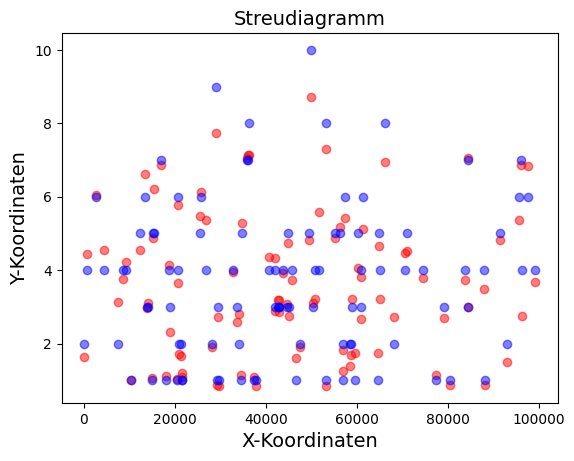

In [29]:
import matplotlib.pyplot as plt
x = X_test["id"].copy()


plt.scatter(x[0:100],y_pred[0:100], color="red", alpha=0.5)
plt.scatter(x[0:100],y_test[0:100], color="blue",alpha=0.5)
# Achsenbeschriftungen hinzufügen
plt.xlabel('X-Koordinaten')
plt.ylabel('Y-Koordinaten')

# Titel hinzufügen
plt.title('Streudiagramm')

# Diagramm anzeigen
plt.show()

In [16]:
data = pd.read_csv("/kaggle/input/dat1582/test_data.csv")
pred = random_search.predict(data)
preds = []

for e in pred:
    preds.append(e)
ids = []
for index, row in data.iterrows():
    for index, value in row.items():
        if(index == "id"):
            ids.append(value)



df = pd.DataFrame({'id': ids,
                   'lengthofstay': preds})
import os 
if(not os.path.exists("./output")):
    os.makedirs("./output")
df.to_csv("./output/boostist2.csv",index=False)

# Gradio  
Unfortunately it doesn't work in Kaggle but it works locally and on huggingface.co.  

[Hospital stay length prediction online hosted](https://huggingface.co/spaces/JonasFeierabend/DAT158)


In [5]:
#load model and install gradio 
def load_model(): 
    import joblib
    return joblib.load("/kaggle/input/final-random-forrest/final.pkl")
model = load_model()


#This way i dont have so much trubble when restarting 
!pip install gradio --target=/kaggle/working/mysitepackages


# add to system path (because above is not a standard installation)
import sys
sys.path.append('/kaggle/working/mysitepackages')

import gradio as gr 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 35.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.6/520.6 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 43.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
# doesnt work in kaggle but works in spaces: https://huggingface.co/spaces/JonasFeierabend/DAT158

 

import pandas as pd
train_data = pd.read_csv("/kaggle/input/dat1582/training_data.csv")
def predict(bmi,sex,asthma,iron,creat):
    standard_data = train_data.iloc[[0]]
    standard_data.iat[0,standard_data.columns.get_loc("bmi")] = bmi
    standard_data.iat[0,standard_data.columns.get_loc("gender")] = "M"
    standard_data.iat[0,standard_data.columns.get_loc("asthma")] = asthma
    standard_data.iat[0,standard_data.columns.get_loc("irondef")] = iron
    standard_data.iat[0,standard_data.columns.get_loc("creatinine")] = creat
    
    pred = model.predict(standard_data)
    ergebnis = int(float(pred[0]))

    return ergebnis
  



predict(22.5,"M",False,False,0.5)

# Set the minimum, maximum, and default values for the sliders

bmi_min, bmi_max, bmi_default = 15, 50, 25


# Create the interface
iface = gr.Interface(
    fn=predict, 
    inputs=[
        gr.components.Slider(minimum=bmi_min, maximum=bmi_max, value=bmi_default, label="BMI"),
        gr.components.Dropdown(choices=["M", "F"],label="Geschlecht",value="M"),
        gr.components.Checkbox(label="Asthma"),
        gr.components.Checkbox(label="Irondefizit"),
        gr.components.Slider(minimum=0.1, maximum=2.5, value = 0.5, label="Creatine")
    ], 
    outputs=gr.components.Textbox(label="Prediction"),
    title="Diabetes Predictor",
    description="""Enter your age, BMI, and glucose level to predict whether you are diabetic or non-diabetic.
    Data source: Pima Indians Diabetes Database; Model: Random Forest Classifier""",
)

# Launch the interface
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://1f475368b08f70e862.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
